# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:

suppressPackageStartupMessages({
  library(multcomp)
  library(car)
  library(tidyr)
  library(lme4)
  library(ggplot2)
  library(ggtext)
  library(ggpmisc)
  library(nlme)
  library(latex2exp)
  library(kableExtra)
  library(broom)
  library(dplyr)
  library(MuMIn)
})

options(warn = -1)
RES <- readRDS("~/Documents/Master Thesis/Master-Thesis-P-kinetics/data/RES.rds")
D <- RES$D
d <- RES$data


Model Agroscope $$Y_{rel}\sim A*(1-e^{rate*P_{CO_2}+Env})$$

Wir ersetzen nur rate mit unserer Schätzung k: $$Y_{rel}\sim A*(1-e^{k*P_{CO_2}+Env})$$

Sind unsere Modelparameter gute Prediktoren?? $$Y_{rel}\sim A*(1-e^{k*PS+Env} )$$

Es gibt noch die Kovariaten Niederschlag pro Jahr, Jahresdurchschnittstemperatur und Temperatur in Jugendphase

In [ ]:

library(GGally)

ggpairs(D, 
  aes(col=Site, shape = Treatment,alpha = 0.6), 
  columns = c("soil_0_20_P_AAE10", "soil_0_20_P_CO2", "PS", "k", "kPS"),
  lower = list(continuous = wrap("points", size = 1.3)),
  upper = list(continuous = "blank", combo = "blank", discrete = "blank"))  # Adjust size here
  




p6 <- ggplot(D,aes(y=soil_0_20_P_AAE10, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) + 
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{H_2O10}(mg/kg Soil)$"),
         y=TeX("$P_{AAEDTA}(mg/kg Soil)$")); p6
  
p7 <- ggplot(D,aes(y=PS, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
          y=TeX("$PS(mg/kg Soil)$")); p7

p8 <- ggplot(D,aes(y=k, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
         y=TeX("$k(1/s)$")); p8

p9 <- ggplot(D,aes(y=k*PS, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
         y=TeX("$v=k*PS(mg/s*kg Soil)$"));p9


p11 <- ggplot(D,aes(y=PS, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  scale_x_log10() + scale_y_log10() +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$PS(mg/kg Soil)$")); p11

p12 <- ggplot(D,aes(y=k, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
   scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$k(1/s)$"))

p12

p13 <- ggplot(D,aes(y=k*PS, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  scale_x_log10() + scale_y_log10() +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$log(v)=log(k*PS)(mg/s*kg Soil)$"))

p13


Nun noch die Linearen Regressionen, die ausstehend sind:

`(1|year) + (1|Site)  + (1|Site:block) + (Treatment|Site)`

Random intercept per year and site, block nested in site. and Treatment nested in site (could also be modelled as a random slope to allow for correlations)

wir sind abe nicht an einem Treatment effekt interesseiert. drum verwerfen wir Treatment als Random UND Fixed effekt.

1.  Vergleiche PS, k und kPS mit


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.02402412 0.9173943

           R2m       R2c
[1,] 0.2379547 0.8674634

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

           R2m       R2c
[1,] 0.2053782 0.3438158

boundary (singular) fit: see help('isSingular')

          R2m      R2c
[1,] 0.235125 0.386079

           R2m       R2c
[1,] 0.2211135 0.3097055

boundary (singular) fit: see help('isSingular')

           R2m       R2c
[1,] 0.2523622 0.3433311

            R2m       R2c
[1,] 0.08179225 0.4333343

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: Ymain_norm ~ k * log(PS) + (1 | year) + (1 | Site) + (1 | Site:block)
   Data: D
 Subset: Treatment == "P0"

REML criterion at convergence: -97.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.78836 -0.53761 -0.04547  0.50347  2.85490 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept) 0.001626 0.04033 
 year       (Intercept) 0.003921 0.06262 
 Site       (Intercept) 0.005720 0.07563 
 Residual               0.018163 0.13477 
Number of obs: 104, groups:  Site:block, 16; year, 6; Site, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)
(Intercept)   0.1623     0.7007  9.8198   0.232    0.822
k             4.6186     3.6945  9.8503   1.250    0.240
log(PS)      -0.2364     0.2027  9.7951  -1.166    0.271
k:log(PS)     1.5675     1.0796 10.0055   1.452    0.177

Correlation of Fixed Effects:
          (Intr) k      lg

boundary (singular) fit: see help('isSingular')

            R2m        R2c
[1,] 0.03459314 0.07997467

boundary (singular) fit: see help('isSingular')

            R2m        R2c
[1,] 0.05218996 0.09439205

          R2m      R2c
[1,] 0.218175 0.358219

           R2m       R2c
[1,] 0.1976951 0.4740521

           R2m       R2c
[1,] 0.2204812 0.3650344

boundary (singular) fit: see help('isSingular')

          R2m      R2c
[1,] 0.235125 0.386079

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

               GVIF Df GVIF^(1/(2*Df))
k         10.946397  1        3.308534
log(PS)   15.324810  1        3.914692
crop       1.001335  4        1.000167
k:log(PS) 31.327404  1        5.597089

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

                            GVIF Df GVIF^(1/(2*Df))
scale(k)                1.098955  1        1.048311
scale(log(PS))          1.112618  1        1.054807
crop                    1.001335  4        1.000167
scale(k):scale(log(PS)) 1.080146  1        1.039301

            GVIF Df GVIF^(1/(2*Df))
k       1.074464  1        1.036563
log(PS) 1.073606  1        1.036150
crop    1.001116  4        1.000139

                GVIF Df GVIF^(1/(2*Df))
I(k * (PS)) 4.518544  1        2.125687
k           1.645019  1        1.282583
log(PS)     4.783178  1        2.187048
crop        1.001142  4        1.000143

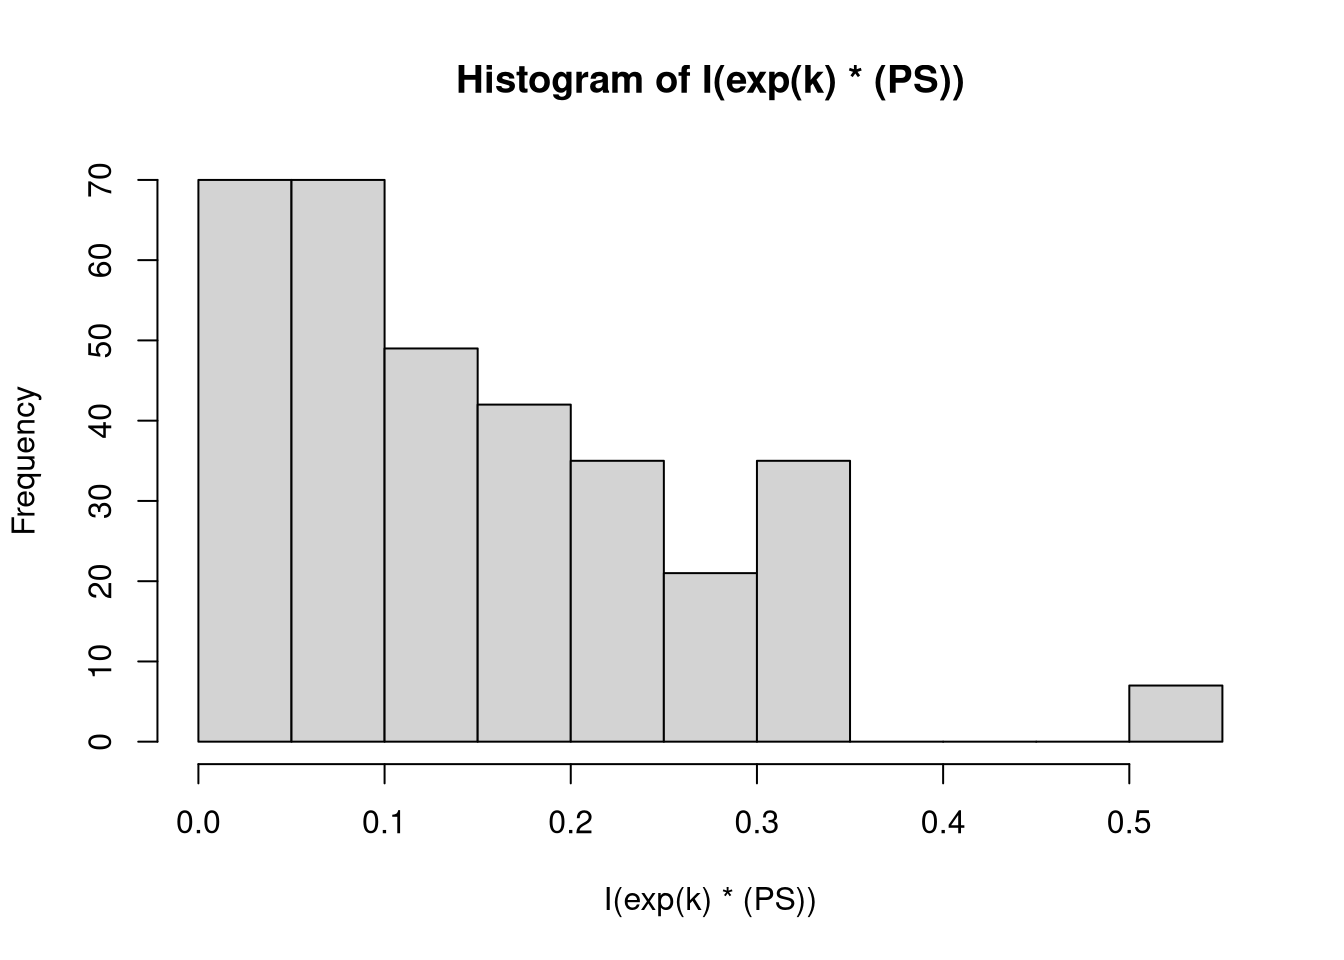

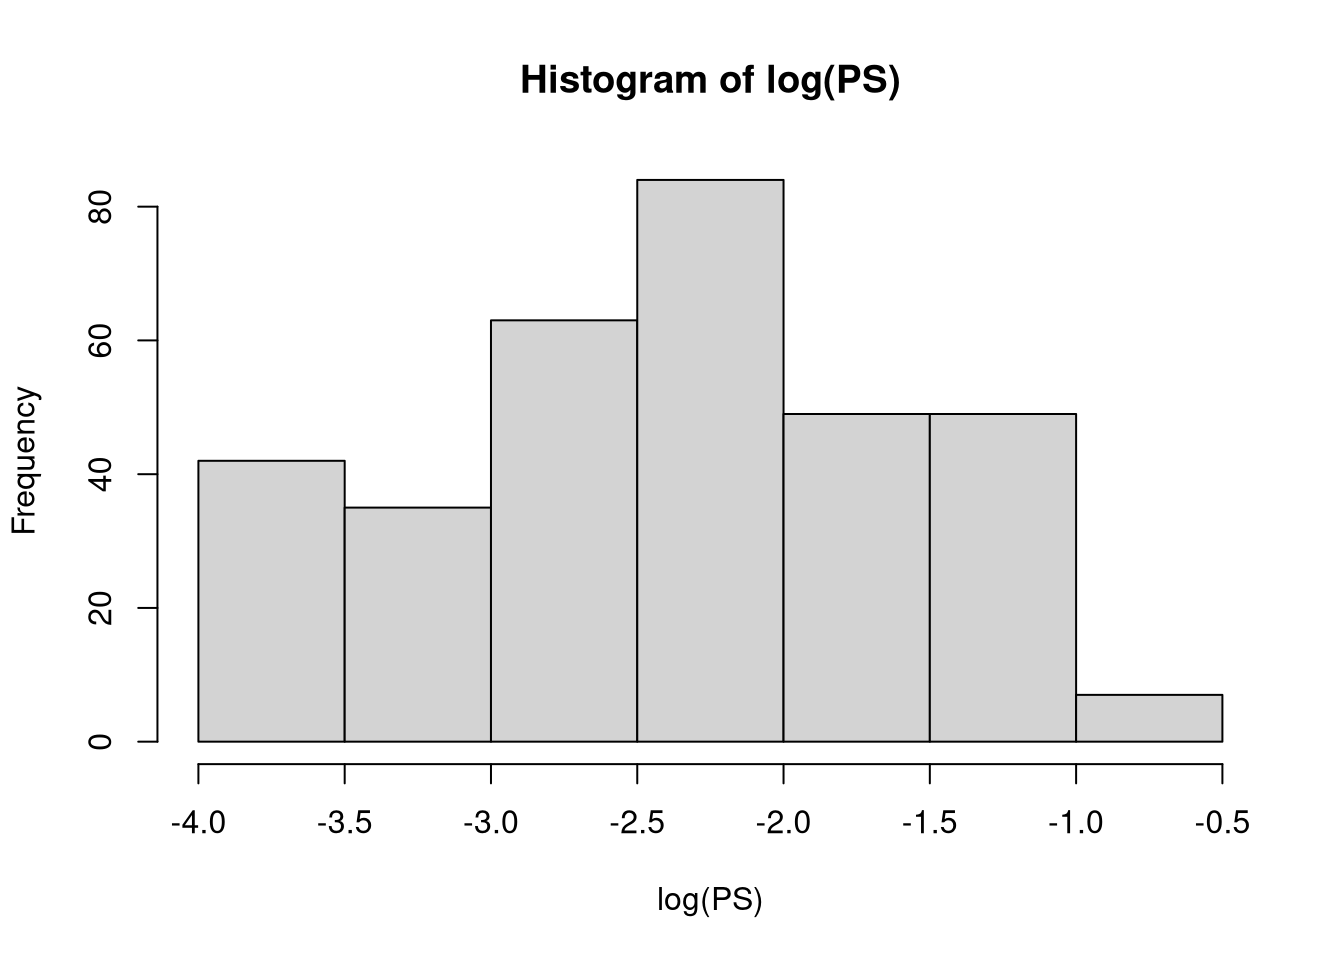

          R2m      R2c
[1,] 0.235125 0.386079

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.05971 0.05971     1 60.276  1.7198 0.194695   
soil_0_20_pH_H2O 0.00345 0.00345     1 70.953  0.0994 0.753472   
soil_0_20_Corg   0.36612 0.36612     1 50.241 10.5444 0.002079 **
soil_0_20_silt   0.01827 0.01827     1 82.723  0.5263 0.470228   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.0037589 0.0037589     1 66.215  2.9776 0.089090 . 
soil_0_20_pH_H2O 0.0103321 0.0103321     1 64.590  8.1844 0.005686 **
soil_0_20_Corg   0.0000556 0.0000556     1 66.276  0.0441 0.834382   
soil_0_20_silt   0.0082941 0.0082941     1 51.342  6.5701 0.013342 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + (1 | year) + (1 | Site) + (1 | Site:block) + 
    (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0      -0.130397   0.140751  -0.926   0.8033  
soil_0_20_clay == 0   -0.003849   0.002231  -1.726   0.2916  
soil_0_20_pH_H2O == 0  0.032934   0.011512   2.861   0.0184 *
soil_0_20_Corg == 0   -0.006614   0.031508  -0.210   0.9990  
soil_0_20_silt == 0    0.006743   0.002631   2.563   0.0436 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.005861 0.005861     1 82.839  0.0917 0.76273  
soil_0_20_pH_H2O 0.253558 0.253558     1 82.702  3.9692 0.04964 *
soil_0_20_Corg   0.017639 0.017639     1 70.803  0.2761 0.60090  
soil_0_20_silt   0.035303 0.035303     1 88.410  0.5526 0.45921  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + (1 | year) + (1 | Site) + 
    (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -6.10829    1.31189  -4.656   <0.001 ***
soil_0_20_clay == 0   -0.00606    0.02001  -0.303    0.997    
soil_0_20_pH_H2O == 0  0.19127    0.09601   1.992    0.185    
soil_0_20_Corg == 0    0.12779    0.24319   0.525    0.974    
soil_0_20_silt == 0    0.01849    0.02487   0.743    0.911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
k          950.33  950.33     1 201.84  4.6170 0.03285 *
log(PS)    189.78  189.78     1 202.30  0.9220 0.33809  
k:log(PS) 1303.51 1303.51     1 202.45  6.3329 0.01263 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq  Mean Sq NumDF  DenDF F value   Pr(>F)   
k         0.109336 0.109336     1 195.89  6.4740 0.011717 * 
log(PS)   0.009683 0.009683     1 196.12  0.5734 0.449832   
k:log(PS) 0.163652 0.163652     1 195.38  9.6901 0.002131 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k         35.305  35.305     1 247.74  0.5252 0.4693
log(PS)   39.586  39.586     1 248.15  0.5889 0.4436
k:log(PS) 53.624  53.624     1 248.29  0.7978 0.3726

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.001204 0.001204     1 55.784  0.0365 0.84927  
soil_0_20_pH_H2O 0.166954 0.166954     1 68.215  5.0574 0.02775 *
soil_0_20_Corg   0.195107 0.195107     1 44.241  5.9103 0.01917 *
soil_0_20_silt   0.031962 0.031962     1 81.136  0.9682 0.32805  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.02462 0.02462     1 70.278  0.6521  0.422079    
soil_0_20_pH_H2O 0.79836 0.79836     1 75.915 21.1499 1.666e-05 ***
soil_0_20_Corg   0.31812 0.31812     1 56.367  8.4276  0.005266 ** 
soil_0_20_silt   0.00145 0.00145     1 87.492  0.0383  0.845249    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
k          411.53  411.53     1 228.31  2.6679    0.1038    
log(PS)   2451.66 2451.66     1 236.98 15.8941 8.925e-05 ***
k:log(PS)  335.80  335.80     1 232.66  2.1770    0.1414    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ k * log(PS) + (1 | year) + (1 | Site) + (1 |  
    Site:block)
   Data: D

REML criterion at convergence: 2172.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2416 -0.5978  0.0314  0.5493  2.8712 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept)  20.32    4.508  
 year       (Intercept)  59.33    7.703  
 Site       (Intercept)  23.96    4.895  
 Residual               154.25   12.420  
Number of obs: 274, groups:  Site:block, 16; year, 6; Site, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   43.833     10.402 146.527   4.214 4.37e-05 ***
k             84.993     52.035 228.313   1.633    0.104    
log(PS)       16.947      4.251 236.979   3.987 8.92e-05 ***
k:log(PS)     33.029     22.386 232.660   1.475    0.141    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

           R2m       R2c
[1,] 0.5718128 0.7438723

            R2m       R2c
[1,] 0.06433359 0.6476313

            R2m       R2c
[1,] 0.09057145 0.5941011

          R2m      R2c
[1,] 0.235125 0.386079

In [ ]:


# Wovon hängen Modelparameter ab?

library(lmerTest)


Since we now model two measurement methods, we do not expect correlations by Site/year/etc

In [ ]:
# fit.PS       <- lm(PS            ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10, D)
fit.grud.PS       <- lm(log(PS)         ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.k        <- lm(k               ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.kPS      <- lm(I(log(k*PS))    ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)

fit.grud.CO2.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)
fit.grud.AAE10.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_AAE10) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = log(PS) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -0.61404    0.20562  -2.986  0.00537 ** 
log(soil_0_20_P_CO2) == 0    1.30106    0.05963  21.819  < 0.001 ***
log(soil_0_20_P_AAE10) == 0 -0.24892    0.05163  -4.821  < 0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0             0.074843   0.026807   2.792   0.0102 *  
log(soil_0_20_P_CO2) == 0   -0.031362   0.007774  -4.034   <0.001 ***
log(soil_0_20_P_AAE10) == 0  0.029663   0.006731   4.407   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(log(k * PS)) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -2.89619    0.20538 -14.102   <0.001 ***
log(soil_0_20_P_CO2) == 0    1.12637    0.05956  18.912   <0.001 ***
log(soil_0_20_P_AAE10) == 0 -0.10426    0.05157  -2.022   0.0713 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Ymain_rel ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + (1 |  
    year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1740.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.00124 -0.58425 -0.01625  0.57153  2.82374 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   2.612   1.616  
 Site:Treatment (Intercept)  15.818   3.977  
 year           (Intercept) 161.127  12.694  
 Site           (Intercept)  54.936   7.412  
 Residual                   196.854  14.030  
Number of obs: 212, groups:  
Site:block, 16; Site:Treatment, 12; year, 5; Site, 4

Fixed effects:
                       Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)            108.4942    17.6735  40.7465   6.139 2.81e-07 ***
log(soil_0_20_P_CO2)     9.6918     4.2287  30.9801   2.292   0.0289 *  


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_uptake ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1844.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1941 -0.4246 -0.0380  0.3941  4.7946 

Random effects:
 Groups         Name        Variance  Std.Dev.
 Site:block     (Intercept) 0.000e+00 0.000000
 Site:Treatment (Intercept) 1.036e-06 0.001018
 year           (Intercept) 7.372e+01 8.586275
 Site           (Intercept) 2.427e+01 4.926572
 Residual                   6.686e+01 8.177020
Number of obs: 259, groups:  
Site:block, 16; Site:Treatment, 12; year, 6; Site, 4

Fixed effects:
                       Estimate Std. Error       df t value Pr(>|t|)   
(Intercept)             24.7259     8.5160  64.7088   2.903  0.00504 **
log(soil_0_20_P_CO2)     4.5632     1.7896 205.5646   2.550  0.01151 * 
l

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 2129.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3544 -0.5456  0.0619  0.5653  2.8045 

Random effects:
 Groups         Name        Variance  Std.Dev. 
 Site:block     (Intercept) 0.000e+00  0.000000
 Site:Treatment (Intercept) 4.284e+02 20.698518
 year           (Intercept) 5.796e+01  7.613248
 Site           (Intercept) 1.382e-06  0.001176
 Residual                   1.145e+02 10.701982
Number of obs: 274, groups:  
Site:block, 16; Site:Treatment, 12; year, 6; Site, 4

Fixed effects:
                       Estimate Std. Error       df t value Pr(>|t|)
(Intercept)              6.5755    15.3463 150.9194   0.428    0.669
log(soil_0_20_P_CO2)    -0.4298     4.2050 260.9580  -0.102    0.919
log

              R2m       R2c
[1,] 0.0006758751 0.8095345

            R2m       R2c
[1,] 0.06600072 0.6211875

            R2m       R2c
[1,] 0.07256889 0.5767479

In [ ]:
create_coef_table <- function(lmer_models, 
                              covariate_order = NULL, 
                              covariate_labels = NULL, # NEU: Benannter Vektor für Zeilennamen
                              model_labels = NULL) {   # NEU: Benannter Vektor für Spaltennamen

  # Extract coefficients and p-values (Ihre Originalfunktion, keine Änderung hier)
  extract_coef_info <- function(model) {
    # ... (keine Änderung, Ihr Code bleibt hier)
    coef_matrix <- summary(model)|> coef()
    estimates <- coef_matrix[, 1]
    p_values <- coef_matrix[, ncol(coef_matrix)]
    formatted_coef <- sapply(seq_along(estimates), function(i) {
      est_str <- sprintf("%.3f", estimates[i])
      stars <- if (p_values[i] < 0.001) "***" else
               if (p_values[i] < 0.01) "** " else
               if (p_values[i] < 0.05) "* " else  ""
      paste0(stars, est_str)
    })
    names(formatted_coef) <- rownames(coef_matrix)
    return(formatted_coef)
  }

  # Extract R-squared values (Ihre Originalfunktion, keine Änderung hier)
  extract_r_squared <- function(model) {
    # ... (keine Änderung, Ihr Code bleibt hier)
    r2_values <- MuMIn::r.squaredGLMM(model) # MuMIn:: hinzugefügt für Klarheit
    return(c(
      R2m = sprintf("%.3f", r2_values[1, "R2m"]),
      R2c = sprintf("%.3f", r2_values[1, "R2c"])
    ))
  }

  # Daten extrahieren (Ihr Originalcode)
  all_coefs <- lapply(lmer_models, extract_coef_info)
  all_r_squared <- lapply(lmer_models, extract_r_squared)
  all_covariate_names <- unique(unlist(lapply(all_coefs, names)))

  if (is.null(covariate_order)) {
    covariate_order <- c("(Intercept)", sort(all_covariate_names[all_covariate_names != "(Intercept)"]))
  }
  covariate_order <- covariate_order[covariate_order %in% all_covariate_names]
  final_order <- c(covariate_order, "R2m", "R2c")

  # Matrix erstellen (Ihr Originalcode)
  results_matrix <- matrix("",
                           nrow = length(final_order),
                           ncol = length(lmer_models),
                           dimnames = list(final_order, names(lmer_models)))

  # Matrix füllen (Ihr Originalcode)
  for (model_name in names(lmer_models)) {
    model_coefs <- all_coefs[[model_name]]
    for (covar in names(model_coefs)) {
      if (covar %in% covariate_order) {
        results_matrix[covar, model_name] <- model_coefs[covar]
      }
    }
    r2_values <- all_r_squared[[model_name]]
    results_matrix["R2m", model_name] <- r2_values["R2m"]
    results_matrix["R2c", model_name] <- r2_values["R2c"]
  }

  # --- NEU: Zeilen- und Spaltennamen ersetzen ---
  
  # Ersetze die Zeilennamen (Kovariaten), falls covariate_labels übergeben wurde
  if (!is.null(covariate_labels)) {
    # Finde die Übereinstimmungen in den aktuellen Zeilennamen
    row_matches <- match(rownames(results_matrix), names(covariate_labels))
    # Ersetze nur die, die gefunden wurden
    new_rownames <- rownames(results_matrix)
    new_rownames[!is.na(row_matches)] <- covariate_labels[row_matches[!is.na(row_matches)]]
    rownames(results_matrix) <- new_rownames
  }
  
  # Ersetze die Spaltennamen (Modelle), falls model_labels übergeben wurde
  if (!is.null(model_labels)) {
    col_matches <- match(colnames(results_matrix), names(model_labels))
    new_colnames <- colnames(results_matrix)
    new_colnames[!is.na(col_matches)] <- model_labels[col_matches[!is.na(col_matches)]]
    colnames(results_matrix) <- new_colnames
  }
  
  # --- Ende der neuen Sektion ---

  # Convert to data frame for kable
  results_df <- data.frame(Covariate = rownames(results_matrix),
                           results_matrix,
                           check.names = FALSE, # Verhindert, dass R Spaltennamen ändert
                           stringsAsFactors = FALSE)
  
  results_df
}


In [ ]:
lmer_models <- list(
  PS = fit.soil.PS,
  k = fit.soil.k,
  'log(k*PS)' = fit.soil.kPS,
  'k*log(PS)' = fit.soil.kPS2,
  CO2 = fit.soil.CO2,
  AAE10 = fit.soil.AAE10
)



coef_table_soil <- create_coef_table(lmer_models)
kable(coef_table_soil,
row.names = FALSE,
align = c("l", rep("r", ncol(coef_table_soil) - 1)),
escape = FALSE,
caption = "Coefficient Table for Soil covariates. 
Significant codes:  0 '\\*\\*\\*' 0.001 '\\*\\*' 0.01 '\\*' 0.05")


  ---------------------------------------------------------------------------------------------
  Covariate                      PS        k     log(k\*PS)   k\*log(PS)      CO2         AAE10
  ------------------ -------------- -------- -------------- ------------ -------- -------------
  (Intercept)          \*\*\*-3.807   -0.130   \*\*\*-6.108       -0.216       \*        -0.419
                                                                           -2.034 

  soil_0_20_clay              0.018   -0.004         -0.006     \* 0.014    0.002         0.012

  soil_0_20_Corg         \*\* 0.507   -0.007          0.128        0.077 \* 0.364    \*\* 0.502

  soil_0_20_pH_H2O            0.021     \*\*       \* 0.191       -0.066 \* 0.141   \*\*\*0.323
                                       0.033                                      

  soil_0_20_silt             -0.013 \* 0.007          0.018       -0.013   -0.017        -0.004

  R2m                         0.074    0.356          0.024        0.238    0.035         0.091

  R2c                         0.955    0.704          0.917        0.867    0.931         0.931
  ---------------------------------------------------------------------------------------------

  : Coefficient Table for Soil covariates. Significant codes: 0 '\*\*\*'
  0.001 '\*\*' 0.01 '\*' 0.05


  -------------------------------------------------------------------------------------------------------------------------------------------------------------
  Covariate                                        Yn-STP-CO2   Yn-STP-AAE10   Yn-STP-GRUD    Yn-Kinetic   Yn-STP-CO2   Yn-STP-AAE10   Yn-STP-GRUD   Yn-Kinetic
  --------------------------------------------- ------------- -------------- ------------- ------------- ------------ -------------- ------------- ------------
  (Intercept)                                     \*\*\*1.059    \*\*\*0.532   \*\*\*1.096   \*\*\*0.874                                           

  k                                                                                             \* 1.781                                           

  k:log(PS)                                                                                   \*\* 0.795                                           

  log(PS)                                                                                         -0.037                                           

  log(soil_0_20_P_AAE10)                                         \*\*\*0.120        -0.006                                                         

  log(soil_0_20_P_CO2)                            \*\*\*0.162                        0.137                                                         

  log(soil_0_20_P_CO2):log(soil_0_20_P_AAE10)                                        0.016                                                         

  R2m                                                   0.218          0.198         0.220         0.235                                           

  R2c                                                   0.358          0.474         0.365         0.386                                           
  -------------------------------------------------------------------------------------------------------------------------------------------------------------

  : Coefficient Table for Ynorm and Yrel. Significant codes: 0 '\*\*\*'
  0.001 '\*\*' 0.01 '\*' 0.05
